In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Dataset

In [2]:
data = pd.read_csv("./datasets/Breast_cancer_data.csv")
data.head(20)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [3]:
x = data[["mean_radius", "mean_texture", "mean_area"]]
y = data.diagnosis

In [4]:
x = np.array(x)
y = np.array(y)

In [5]:
print(x.shape)
y = y.reshape((y.shape[0], 1))
print(y.shape)

(569, 3)
(569, 1)


In [6]:
from plotly import express as px
fig = px.scatter_3d(x=x[:, 0], y=x[:, 1], z=x[:, 2])
fig.show()

In [7]:
normalisation = StandardScaler()
x = normalisation.fit_transform(x)

In [9]:
class LogisticRegression:
    def __init__(self, x_):
        _, n = x_.shape
        self.theta_ = np.random.rand(n+1, 1)

    def predict(self, x_):
        m, _ = x_.shape
        X_ = np.hstack((x_, np.ones((m, 1)) ))
        return X_ @ self.theta_

    def logistic_function(self, x_):
        return 1 / (1 + np.exp(-self.predict(x_)))

    def cost_function(self, x_, y_):
        m, _ = x_.shape
        return (1/m) * np.sum(-y_ * np.log(self.logistic_function(x_)) - (1 - y_) * np.log(1 - self.logistic_function(x_)) )

    def fit(self, x_, y_, learning_rate=0.01, n_iterations=1000):
        m, _ = x_.shape
        X_ = np.hstack((x_, np.ones((m, 1)) ))
        cost_history_ = np.zeros(n_iterations)

        for i in range(0, n_iterations):
            self.theta_ = self.theta_ - ( (learning_rate/m) * X_.transpose() @ (self.logistic_function(x_) - y_) )
            cost_history_[i] = self.cost_function(x_, y_)
        return cost_history_

In [12]:
logistic_reg = LogisticRegression(x)
J_history = logistic_reg.fit(x, y, learning_rate=0.05)

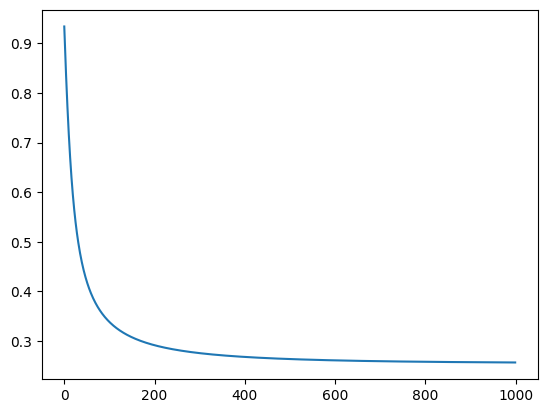

In [13]:
plt.plot(J_history)
plt.show()

In [14]:
y_pred = logistic_reg.predict(x)

In [15]:
logistic_reg.theta_

array([[-1.86060254],
       [-0.85323618],
       [-1.56846953],
       [ 0.56851136]])